#  Original Problem
A parachutist of mass 70 kg jumps from a plane at an altitude of 32 km above the surface of the Earth.  Unfortunately, the parachute fails to open (In the parts above, neglect horizontal motion and assume the initial velocity is zero.)

1. Calculate the time of fall (accurate to 1 s) until ground impact, given no air resistance and a constant value of g.
2. Calculate the time of fall (accurate to 1 s)  to ground impact given constant g and a force of air resistance given by, $F(V) = -c_22v|v|$, where $c_2$ is 0.5 in SI units for a falling man and is constant.
3. Calculate the time of fall (accurate to 1 s) until ground impact  where $c_2$ scales with atmospheric density as $c_2 = 0.5 e^{(-y/H)}$ where $H = 8$ km is the scale height of the atmosphere and y is the height above the ground.   Furthermore, assume g is no longer constant and is given by
$$g = \frac{9.8}{\left(1 + \frac{y}{R_e^2}\right)^2}$$
4. For case c, plot the acceleration, velocity and height as a function of time.  Explain why the acceleration becomes positive as the parachutist falls



In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline

## Linear Case

In [15]:
def no_drag(t, x):
  
    #  Allocate a xprime vector.  This will eventually be returned by the function
    xprime = np.zeros(2)

    #  Extract components from our input vector.
    y = x[0]
    v = x[1]
    
    #  Define contants
    g = 9.8
    
    xprime[0] = v
    xprime[1] = -g
    
    return xprime

def events(t, x):
    return x[0]

events.terminal = True

Time to impact =  80.81220356417685 sec.


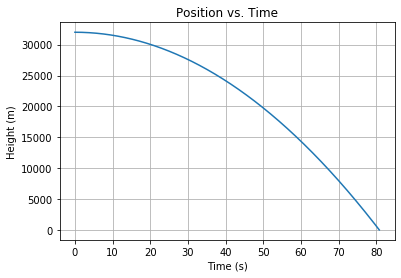

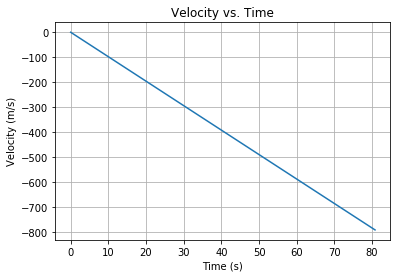

In [16]:
x0 = [32000, 0]

#  The variable tspan has the start and end times of the inegration which
#  teval is a vector of time points for the solution to be evaulated at.
t_f = 100
tspan = (0, t_f)
teval = np.linspace(0, t_f, 1000)

#  Call the solver.
sol = solve_ivp(no_drag, tspan, x0, t_eval = teval, events = events)

#  Extract the time and position/velocty vector from sol
t = sol.t
y = sol.y

print('Time to impact = ', sol.t_events[0][0], 'sec.')
plt.plot(t, y[0])
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Position vs. Time')
plt.grid(True)

plt.figure()
plt.plot(t, y[1])
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time')
plt.grid(True)

##  Euler Method Using Loops

###  Euler Method
We can approximate the derivative of a function $f(t)$ with a differencing formula.
$$
\frac{df}{dt} \approx \frac{f(t_{i+1}) - f(t_i)}{t_{i+1} - t_t}
$$

For our problem,

$$a = \frac{dV}{dt} = -g$$
with the velcoty at $t=0$ given by, $V(0) = 0$
If we take a small time step $\Delta t$, and set $V_1 = V(0) = 0$, we can find the velocity at ofther times using the differencing forumal
$$
V_{i+1} = V_i -g \Delta t..
$$

Written out explicitly,
\begin{array}{ll}
V_1 & = & 0 \\
V_2 & = & V_1 - g\Delta t \\
V_3 & = & V_2 - g\Delta t \\
V_4 & = & V_3 - g\Delta t
\end{array}

Since we also know our position at $t = 0$ is $y(0) = 32000$ and we know our velocities at all time steps, we can work out the position at these time stes as well.

$$
y_{i+1} = y_i + V_i \Delta t..
$$
Or,
\begin{array}{ll}
y_1 & = & 32000 \\
y_2 & = & y_1 + V_2\Delta t \\
y_3 & = & y_2 + V_3\Delta t \\
y_4 & = & y_3 + V_4\Delta t
\end{array}

Notice that all these equations are linear.

80.79999999999968


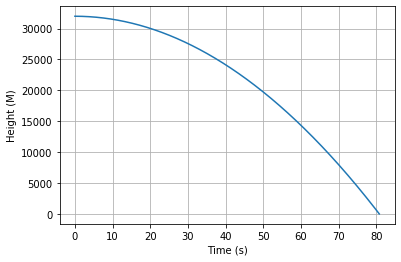

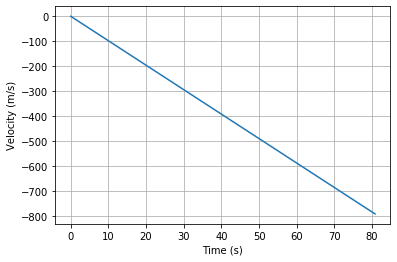

In [17]:
#  Time step for Euler integration
dt = 0.1

#  Initial time
t = 0

#  Acceleration due to gravity
g = -9.8

#  Create an array to hold our times
time = []
time.append( t )

# Create vectors to hold our positions and velocities
y = np.array( [32000] )
V = np.array( [0] )

#  While the altitude is positive, run our Euler steps
while t <= 85:
    #  These are our Euler steps
    V = np.append(V, V[-1] + g * dt)
    y = np.append( y, y[-1] + V[-1] * dt)
    
    #  Advance to next time an  append it to the time array
    t = t + dt
    time.append( t )
    
    if y[-1] <= 0:
        break
        
#  Print the results and plot the height and velocity
print(time[-1])

plt.plot(time, y)
plt.ylabel('Height (M)')
plt.xlabel('Time (s)')
plt.grid(True)

plt.figure()
plt.plot(time, V)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)

The equations above can be recast in matrix beform.  For a total of five time steps, we would have,

$$
\left(
\begin{matrix}
1  &  0  &  0  &  0  &  0  &  -1  &  0  &  0  &  0  &  0 \\
-\Delta^{-1}  &  \Delta^{-1}  &  0  &  0  &  0  &  0  &  -1  &  0  &  0  &  0 \\
0  &  -\Delta^{-1}  &  \Delta^{-1}  &  0  &  0  &  0  &  0  &  -1  &  0  &  0 \\
0  &  0  &  -\Delta^{-1}  &  \Delta^{-1}  &  0  &  0  &  0  &  0  &  -1  &  0 \\
0  &  0  &  0  &  -\Delta^{-1}  &  \Delta^{-1}  &  0  &  0  &  0  &  0  &  -1 \\
0  &  0  &  0  &  0  &  0  &  1  &  0  &  0  &  0  &  0 \\
0  &  0  &  0  &  0  &  0  &  -\Delta^{-1}  &  \Delta^{-1}  &  0  &  0  &  0 \\
0  &  0  &  0  &  0  &  0  &  0  &  -\Delta^{-1}  &  \Delta^{-1}  &  0  &  0 \\
0  &  0  &  0  &  0  &  0  &  0  &  0  &  -\Delta^{-1}  &  \Delta^{-1}  &  0 \\
0  &  0  &  0  &  0  &  0  &  0  &  0  &  0  &  -\Delta^{-1}  &  \Delta^{-1}
\end{matrix}
\right) \left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
V_1 \\
V_2 \\
V_3 \\
V_4 \\
V_5
\end{array}
\right)=\left(
\begin{array}{c}
32000\\
0 \\
0 \\
0 \\
0 \\
0 \\
-9.8 \\
-9.8 \\
-9.8 \\
-9.8
\end{array}
\right)
$$

This problem reduces to finding the inverse of a sprase matrix.

In [18]:
#  Imports for linear algebra functions
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

In [19]:
#  Generate our time vector for plotting
t = np.arange(0, 90, 0.01)

#  Work our number points and time step
N = t.shape[0]
Delta = np.diff(t)[0]
print(N)
print(Delta)

9000
0.01


In [20]:
#  Main diagonal.  Index 0 for our position in the sparse matrix
d = np.ones(2 * N) / Delta

#  Diagonal below the main.  Index -1 for the sprase matrix code
dm1 = -np.ones(2 * N -1) / Delta

#  Couplie the position/velocity and acceleration.  Index N
dN = -np.ones(N)

#  Reset the diagonal elements the corrispond to the initial conditions
d[0] = 1
d[N] = 1

dm1[N-1] = 0

#  Generate sparse matrix
S = diags([dm1, d, dN], [-1, 0, N], format = 'csc')
#plt.spy(S)

#  Generate the right-hand side vector.
y = np.zeros(2*N)
y[0] = 32000
y[N:] = -9.8
y[N] = 0

#  Solve the linear system
x = spsolve(S, y)

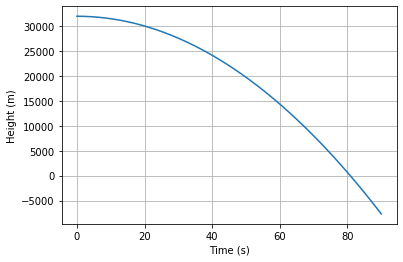

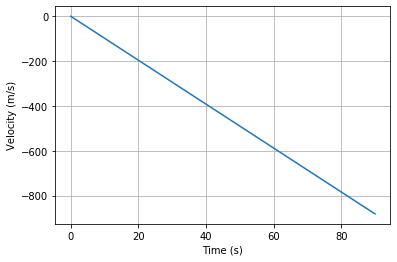

In [22]:
#  Plot the height and velocity
plt.plot(t, x[0:N])
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid(True)

plt.figure()
plt.plot(t, x[N:])
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)